In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dl_file=tfds.download.DownloadManager(download_dir='/content/sample_data')

In [ ]:
plant=dl_file.download_and_extract('https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip')

In [ ]:
!unzip /content/sample_data/extracted/ZIP.md-data-cach-zipf-prod.s3.eu-west-1_tywb-1OAX1Gq-RqqeVcEQluIZ-WScw5j9Get4HuYeJesqkdrg.zip/Plant_leaf_diseases_dataset_with_augmentation.zip 

In [ ]:
mkdir potato_data 

In [ ]:
mv Plant_leave_diseases_dataset_with_augmentation/Potato* potato_data

In [ ]:
batch_size=32
height=200
width=200

In [ ]:
potato_data='/content/potato_data'

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    potato_data,
    batch_size=32,
    image_size=(height,width),
    seed=123,
    validation_split=0.3,
    subset='training'
)

Found 11999 files belonging to 12 classes.
Using 8400 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    potato_data,
    batch_size=32,
    image_size=(height,width),
    validation_split=0.3,
    seed=123,
    subset='validation'
)

Found 11999 files belonging to 12 classes.
Using 3599 files for validation.


In [ ]:
class_names=train_ds.class_names

In [ ]:
auto=tf.data.experimental.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=auto)
val_ds=val_ds.cache().prefetch(buffer_size=auto)

In [ ]:
normal_layer=layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
n_ds=train_ds.map(lambda x,y: (normal_layer(x),y))
image_batch,label_batch=next(iter(n_ds))

In [ ]:

num_class=12
model=Sequential([
   layers.experimental.preprocessing.Rescaling(1./255,input_shape=(height,width,3)),
   layers.Conv2D(16,3,padding='same',activation='sigmoid'),
   layers.MaxPooling2D(),
   layers.Conv2D(32,3,padding='same',activation='sigmoid'),
   layers.MaxPooling2D(),
   layers.Conv2D(64,3,padding='same',activation='sigmoid'),
   layers.MaxPooling2D(),
   layers.Flatten(),
   layers.Dense(128,activation='sigmoid'),
   layers.Dense(num_class)
])

In [ ]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
epochs=20
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
263/263 [==============================] - 13s 48ms/step - loss: 2.4803 - accuracy: 0.1250 - val_loss: 2.3935 - val_accuracy: 0.0975
Epoch 2/20
263/263 [==============================] - 8s 29ms/step - loss: 2.3933 - accuracy: 0.1324 - val_loss: 2.3952 - val_accuracy: 0.1425
Epoch 3/20
263/263 [==============================] - 8s 29ms/step - loss: 2.3944 - accuracy: 0.1323 - val_loss: 2.3893 - val_accuracy: 0.1425
Epoch 4/20
263/263 [==============================] - 8s 30ms/step - loss: 2.3936 - accuracy: 0.1348 - val_loss: 2.3881 - val_accuracy: 0.1425
Epoch 5/20
263/263 [==============================] - 8s 30ms/step - loss: 2.3940 - accuracy: 0.1283 - val_loss: 2.3893 - val_accuracy: 0.1425
Epoch 6/20
263/263 [==============================] - 8s 30ms/step - loss: 2.3931 - accuracy: 0.1317 - val_loss: 2.3927 - val_accuracy: 0.1425
Epoch 7/20
263/263 [==============================] - 8s 30ms/step - loss: 2.3943 - accuracy: 0.1339 - val_loss: 2.3914 - val_accuracy: 0.142

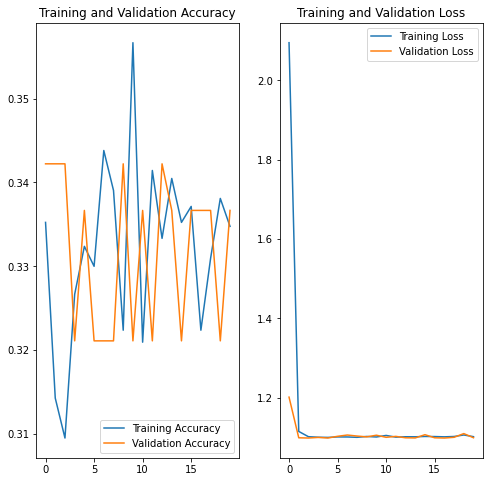

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(height, 
                                                              width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)


In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_class)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
66/66 [==============================] - 2s 26ms/step - loss: 2.6190 - accuracy: 0.3424 - val_loss: 1.1042 - val_accuracy: 0.3211
Epoch 2/100
66/66 [==============================] - 2s 24ms/step - loss: 1.1036 - accuracy: 0.3290 - val_loss: 1.0992 - val_accuracy: 0.3422
Epoch 3/100
66/66 [==============================] - 2s 24ms/step - loss: 1.1027 - accuracy: 0.3243 - val_loss: 1.1051 - val_accuracy: 0.3211
Epoch 4/100
66/66 [==============================] - 2s 24ms/step - loss: 1.1051 - accuracy: 0.3238 - val_loss: 1.0985 - val_accuracy: 0.3422
Epoch 5/100
66/66 [==============================] - 2s 24ms/step - loss: 1.1052 - accuracy: 0.3243 - val_loss: 1.0978 - val_accuracy: 0.3422
Epoch 6/100
66/66 [==============================] - 2s 24ms/step - loss: 1.1006 - accuracy: 0.3352 - val_loss: 1.0977 - val_accuracy: 0.3422
Epoch 7/100
66/66 [==============================] - 2s 24ms/step - loss: 1.1014 - accuracy: 0.3343 - val_loss: 1.0989 - val_accuracy: 0.3378
Epoch 

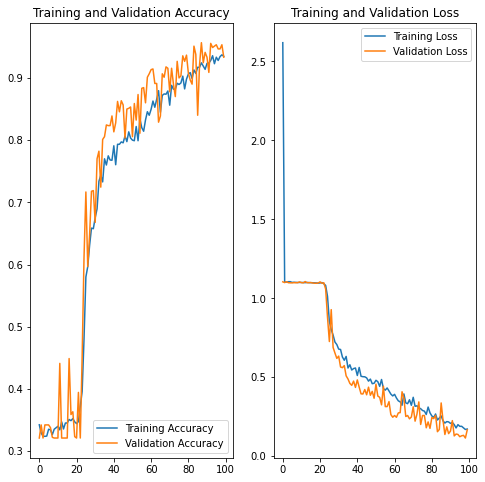

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
import numpy as np

potato_url = "https://ag.umass.edu/sites/ag.umass.edu/files/fact-sheets/images/lateblightTom_lesion3.jpg"
potato_path = tf.keras.utils.get_file('plok', origin=potato_url)

img = keras.preprocessing.image.load_img(
    potato_path, target_size=(height, width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


303104/297103 [==============================] - 0s 1us/step
This image most likely belongs to Potato___healthy with a 80.94 percent confidence.
